# Yelp project BAP

In [4]:
import os
import pandas as pd

## reviews dataset

In [5]:
print(os.getcwd())

/Users/mare/Downloads/BAP_project_2025sem2/MTech-BAP


In [ ]:
df_reviews = pd.read_csv('Data/review_output.csv')
df_daniel_reviews = pd.read_csv('Data/filtered_yelp_reviews_2017_2022.csv')
print('size of reviews dataset::', len(df_reviews.shape))
print(df_reviews.head())
print('size of daniel reviews dataset::', len(df_daniel_reviews.shape))
print(df_daniel_reviews.head())

size of reviews dataset:: 2
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    3.0       0      0     0   
3    5.0       1      0     1   
4    4.0       1      0     1   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30  
3  Wow

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [11]:
df_reviews['stars'].value_counts()

stars
5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: count, dtype: int64

In [8]:
df_reviews.iloc[10]["text"]

"My experience with Shalimar was nothing but wonderful. \nI wanted to get my engagement ring sized and was told over the phone that it could probably be done within the day. \nWhen I brought it by, the team confirmed that the jeweler would be able to accommodate my same-day request and that it would be around $40 (simple band, decrease by three full sizes).\nI checked my size one more time, confirmed, and left to let them do their thing.\nWhen I came to pick up later that afternoon, the ring was too small. It's very important to note that Shalimar sized the ring perfectly, but that I made a mistake and should've gone up a half-size.\nThe Shalimar group were completely understanding and accommodating, even resizing my ring back up and getting it back to me within an hour at no charge! Even though it was my mistake!\nThe associates' attitudes in dealing with what was a pretty embarrassing situation instantly earned my satisfaction and loyalty as a customer. Very grateful for such a wonde

### Data description for review dataset
#### Each row represents a single review left by a user for a business.

1. review_id: Unique identifier for each review (string).
2. user_id: Unique identifier for the user who wrote the review (string).
3. business_id: Unique identifier for the business being reviewed (string).
4. stars: Star rating given by the user (float, typically 1.0 to 5.0).
5. useful: Number of users who marked the review as useful (integer).
6. funny: Number of users who marked the review as funny (integer).
7. cool: Number of users who marked the review as cool (integer).
8. text: Full text of the review written by the user (string).
9. date: Date and time when the review was posted (datetime, format: YYYY-MM-DD HH:MM:SS).

In [18]:
df_reviews_filtered = df_reviews.copy()

In [19]:
# filter to only recent 5 years 
df_reviews_filtered['year'] = pd.to_datetime(df_reviews_filtered['date']).dt.year
df_reviews_filtered = df_reviews_filtered[(df_reviews_filtered['year'] >= 2017) & (df_reviews_filtered['year'] <= 2022)]
print(df_reviews_filtered.shape)
print(df_reviews_filtered['year'].unique())

(3838105, 10)
[2018 2017 2019 2020 2021 2022]


In [20]:
# comparing dataset length with `filtered_yelp_reviews_2017_2022.csv`
print("daniel's filtered yelp review dataset",df_daniel_reviews.shape)
print("current version of filtered dataset",df_reviews_filtered.shape)

daniel's filtered yelp review dataset (1174907, 9)
current version of filtered dataset (3838105, 10)


### Basic data cleaning

In [ ]:
df_reviews_cleaned = df_reviews_filtered.copy()
## handle missing and invalid data
df_reviews_cleaned.isna().sum()
# (df_reviews_cleaned['stars'] == '').any()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

In [28]:
# convert important columns to correct data formats
type_map = {
    'user_id': str,
    'review_id': str,
    'business_id': str,
    'text': str,
    'stars': int
}
df_reviews_cleaned = df_reviews_cleaned.astype(type_map)
df_reviews_cleaned.isna().sum() # check for na again

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
year           0
dtype: int64

In [30]:
df_reviews_cleaned.iloc[13]['stars']

np.int64(5)

In [31]:
dummies = pd.get_dummies(df_reviews_filtered['stars'])
dummies.head()

,1.0,2.0,3.0,4.0,5.0
0,False,False,True,False,False
4,False,False,False,True,False
24,False,False,False,True,False
30,False,False,False,False,True
31,False,False,False,False,True


In [32]:
df_reviews_cleaned = df_reviews_cleaned.dropna(subset=['text'])
# remove empty or whitespace-only text cell values
df_reviews_cleaned = df_reviews_cleaned[df_reviews_cleaned['text'].str.strip() != '']
df_reviews_cleaned.shape

(3838105, 10)

In [35]:
# check range of 'stars' rating column in case of out-of-range values
print("stars rating in reviews data is lowest at: ", df_reviews_cleaned['stars'].min())
print("stars rating in reviews data is highest at: ", df_reviews_cleaned['stars'].max())

stars rating in reviews data is lowest at:  1
stars rating in reviews data is highest at:  5


In [ ]:
# -- standardization and normalization --
df_reviews_cleaned['text'] = df_reviews_cleaned['text'].str.lower() # loweCasing text
df_reviews_cleaned['text'] = df_reviews_cleaned['text'].str.replace(r'\W', ' ', regex=True) # rem special char
df_reviews_cleaned.head(6)

In [ ]:
# drop duplicate rows.
df_reviews_cleaned = df_reviews_cleaned.drop_duplicates()
df_reviews_cleaned.shape

In [ ]:
df_reviews_cleaned.to_csv('Data/cleaned_reviews_2017-2022.csv', index=False)

### EDA explonatory data analysis

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df_reviews_cleaned = pd.read_csv('Data/cleaned_reviews_2017-2022.csv')

stars
1    17.497671
2     7.083496
3     8.066611
4    16.183976
5    51.168246
Name: proportion, dtype: float64


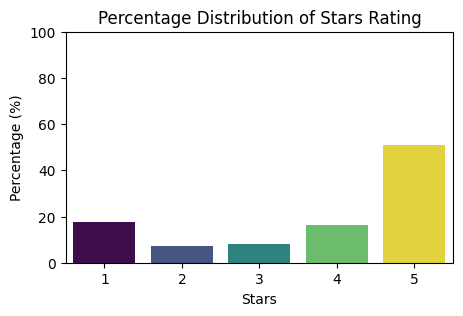

In [7]:
star_counts_percent = df_reviews_cleaned['stars'].value_counts(normalize=True).sort_index() * 100
print(star_counts_percent)

plt.figure(figsize=(5, 3))
sns.barplot(x=star_counts_percent.index, hue=star_counts_percent.index, y=star_counts_percent.values, palette='viridis', legend=False)
plt.title('Percentage Distribution of Stars Rating')
plt.xlabel('Stars')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

In [ ]:
# "useful" column is critical cos it is the count of Yelp users who
# find the review useful
df_reviews_cleaned['useful'].unique()

array([  0,   1,   2,   3,   4,   8,  11,   9,   5,   6,   7,  13,  12,
        19,  16,  10,  18,  17,  14,  27,  21,  23,  29,  15,  20,  26,
        44,  60,  30,  25,  38,  33,  46,  28,  37,  47,  36,  42,  56,
        32,  35,  24,  31,  22,  54,  39,  68,  34,  41,  43, 179,  49,
        50,  73,  52,  74,  66,  45,  65,  72,  48,  91,  82, 135,  51,
        69,  40,  87,  98, 118, 539, 150,  57,  59,  89, 142,  55,  58,
        64,  96,  71,  86, 109,  53, 120,  77, 111, 160,  80,  62, 114,
       346, 152, 190, 123,  75, 115,  81, 217, 199, 197,  85,  93, 132,
       168, 169, 292,  61,  88,  92, 225, 176, 144, 102,  70, 127, 126,
        79, 177, 129, 187, 106, 182,  90, 101,  67, 117, 158, 139, 128,
        84, 181,  83, 140, 171,  63, 162, 192, 100, 163,  76, 125, 116,
        95, 191, 112, 178,  78, 105,  -1, 173, 108, 110, 113, 151,  97,
       156, 119, 148, 107, 164,  94, 155, 153, 103, 211, 104, 236, 196,
       124, 195, 122, 131, 143, 198, 134, 159, 222, 205, 136, 14

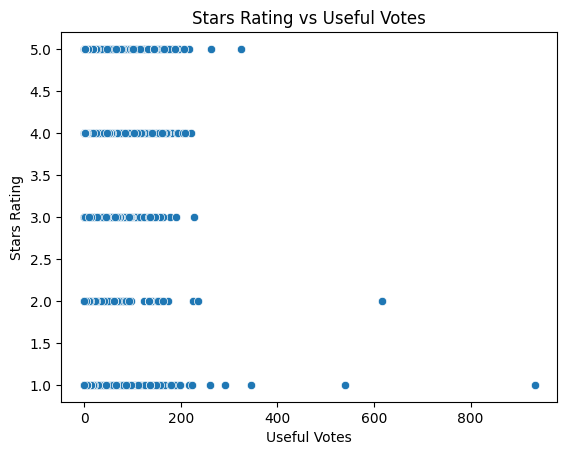

In [53]:
sns.scatterplot(x="useful",y = 'stars',data=df_reviews_cleaned)
plt.title('Stars Rating vs Useful Votes')
plt.xlabel('Useful Votes')
plt.ylabel('Stars Rating')
plt.show()

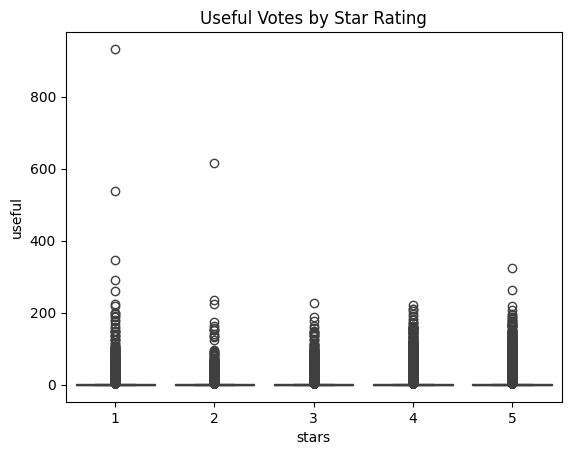

In [57]:
sns.boxplot(x="stars", y="useful", data=df_reviews_cleaned)
plt.title("Useful Votes by Star Rating")
plt.show()

In [62]:
df_reviews_cleaned.dtypes

review_id      object
user_id        object
business_id    object
stars           int64
useful          int64
funny           int64
cool            int64
text           object
date           object
year            int32
dtype: object

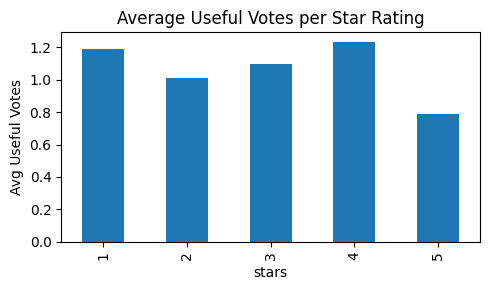

In [ ]:
df_reviews_cleaned.groupby("stars")["useful"].mean().plot(kind="bar", figsize=(5, 3))
plt.title("Average Useful Votes per Star Rating")
plt.ylabel("Avg Useful Votes")
plt.xticks(rotation=90)
plt.tight_layout()  # Prevent label cutoff
plt.show()

### text preprocessing for reviews columns

In [ ]:
import pandas as pd
df_reviews_cleaned = pd.read_csv('Data/cleaned_reviews_2017-2022.csv')

In [8]:
df_reviews_preprocessed = df_reviews_cleaned.copy()
df_reviews_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838105 entries, 0 to 3838104
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   useful       int64 
 5   funny        int64 
 6   cool         int64 
 7   text         object
 8   date         object
 9   year         int64 
dtypes: int64(5), object(5)
memory usage: 292.8+ MB


In [9]:
import string
punc = string.punctuation

In [10]:
## previously alrdy handled special characters in "text" body, but additional safety cleaning
# removing punctuation, punctuation = noise in dataset, cos it carries sentimental values
df_reviews_preprocessed['text'] = df_reviews_preprocessed['text'].str.replace(f'[{punc}]', '', regex=True)
# check if all values in the "text" column are strings
is_all_strings = (df_reviews_preprocessed['text'].apply(type) == str).all()
df_reviews_preprocessed.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,if you decide to eat here just be aware it is...,2018-07-07 22:09:11,2018
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,cute interior and owner gave us tour of up...,2017-01-14 20:54:15,2017
2,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,i was really between 3 and 4 stars for this on...,2018-07-17 03:30:07,2018
3,-P5E9BYUaK7s3PwBF5oAyg,Jha0USGDMefGFRLik_xFQg,bMratNjTG5ZFEA6hVyr-xQ,5,0,0,0,first time there and it was excellent it fe...,2017-02-19 13:32:05,2017
4,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,great burgers fries and salad burgers have a...,2017-01-02 03:17:34,2017


In [11]:
# handling stopwords
import nltk
print("NLTK version:", nltk.__version__)

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stopwords = list(ENGLISH_STOP_WORDS)
print(stopwords[:20])

df_reviews_preprocessed['text'] = df_reviews_preprocessed['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords))
df_reviews_preprocessed['text'].head(5)

NLTK version: 3.9.1
['about', 'forty', 'name', 'very', 'you', 'amongst', 'perhaps', 'was', 'becoming', 'through', 'find', 'under', 'while', 'they', 'are', 'so', 'both', 'latter', 'six', 'anything']


0    decide eat just aware going 2 hours beginning ...
1    cute interior owner gave tour upcoming patio r...
2    really 3 4 stars love 96th street naked tchops...
3    time excellent feels like entering s home wait...
4    great burgers fries salad burgers hint salt pe...
Name: text, dtype: object

In [ ]:
# analysing the text for comparison 
df_reviews_preprocessed.iloc[1234]['text']

'brunch saturday food delicious service great great atmosphere definitely place rotation favorite spots'

In [13]:
df_reviews_cleaned.iloc[1234]['text']

'had brunch on a saturday  food was delicious  service was great  great atmosphere  will definitely put this place in my rotation of favorite spots '

In [14]:
# create new text length column to create new feature for future model training
df_reviews_preprocessed['text_length'] = df_reviews_preprocessed['text'].apply(len)
df_reviews_preprocessed.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,text_length
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,decide eat just aware going 2 hours beginning ...,2018-07-07 22:09:11,2018,266
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,cute interior owner gave tour upcoming patio r...,2017-01-14 20:54:15,2017,343
2,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,really 3 4 stars love 96th street naked tchops...,2018-07-17 03:30:07,2018,817


In [19]:
# validify code 
print(df_reviews_preprocessed.iloc[1]["text"])
len(df_reviews_preprocessed.iloc[1]["text"])

cute interior owner gave tour upcoming patio rooftop area great beautiful days like today cheese curds good filling really like sandwiches come w salad esp eating curds onion gruyere tomato sandwich wasn t cheese liked needed pepper jelly maybe like menu options added salads w fun cheeses lots beer wine limited cocktails time try draft wines


343

In [ ]:
df_reviews_preprocessed.to_csv('Data/textprocessed_reviews_2017-2022.csv', index=False)

In [21]:
df_reviews_preprocessed.shape

(3838105, 11)

### further text processing

In [ ]:
df_reviews_preprocessed = pd.read_csv('Data/textprocessed_reviews_2017-2022.csv')

In [22]:
df_reviews_preprocessed['stars'].unique()

array([3, 4, 5, 2, 1])

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
2  lUUhg8ltDsUZ9h0xnwY4Dg  RreNy--tOmXMl1en0wiBOg  cPepkJeRMtHapc_b2Oe_dw   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      4       1      0     1   
2      4       1      0     1   

                                                text                 date  \
0  decide eat just aware going 2 hours beginning ...  2018-07-07 22:09:11   
1  cute interior owner gave tour upcoming patio r...  2017-01-14 20:54:15   
2  really 3 4 stars love 96th street naked tchops...  2018-07-17 03:30:07   

   year  text_length sentiment_bin  
0  2018          266      Positive  
1  2017          343      Positive  
2  2018          817      Positive  


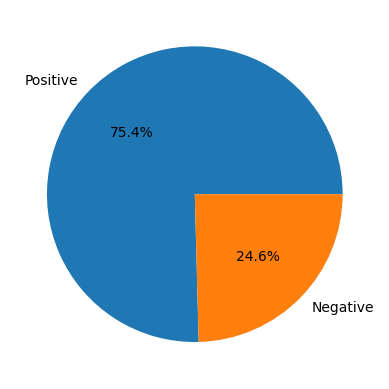

In [25]:
import matplotlib.pyplot as plt

# binning of the ratings column with rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    return "Positive" if rating>2 and rating<=5 else "Negative" # no special handling of invalid values cos all within 1-5

df_reviews_preprocessed['sentiment_bin'] = df_reviews_preprocessed['stars'].apply(ratings)
print(df_reviews_preprocessed.head(3))
plt.pie(df_reviews_preprocessed['sentiment_bin'].value_counts(), labels=df_reviews_preprocessed['sentiment_bin'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [27]:
# mean sentence length for each 'positive' and 'negative' sentimented text body in a dataset
df_reviews_preprocessed['sentiment_bin'] = df_reviews_preprocessed['sentiment_bin'].astype('category')
df_reviews_preprocessed["mean_text_length_by_sentiment"] = (
    df_reviews_preprocessed.groupby("sentiment_bin")["text_length"].transform("mean")
)

print(df_reviews_preprocessed.head(3))


                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
2  lUUhg8ltDsUZ9h0xnwY4Dg  RreNy--tOmXMl1en0wiBOg  cPepkJeRMtHapc_b2Oe_dw   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      4       1      0     1   
2      4       1      0     1   

                                                text                 date  \
0  decide eat just aware going 2 hours beginning ...  2018-07-07 22:09:11   
1  cute interior owner gave tour upcoming patio r...  2017-01-14 20:54:15   
2  really 3 4 stars love 96th street naked tchops...  2018-07-17 03:30:07   

   year  text_length sentiment_bin  mean_text_length_by_sentiment  
0  2018          266      Positive                     273.788715  
1  2017          343      Positive                     273.788715  
2  2018          817      Positive           

/var/folders/x2/vxndd9ls79v3xdfmnnql9ndh0000gn/T/ipykernel_84591/3256900948.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reviews_preprocessed.groupby("sentiment_bin")["text_length"].transform("mean")


In [29]:
# code value checking
print(df_reviews_preprocessed[df_reviews_preprocessed['sentiment_bin']=="Positive"]["mean_text_length_by_sentiment"].iloc[3])
print(df_reviews_preprocessed[df_reviews_preprocessed['sentiment_bin']=="Negative"]["mean_text_length_by_sentiment"].iloc[3])

273.7887149897708
367.99343156136354


## Tip dataset
### Loading and Merging it with Reviews dataset

In [7]:
tip_df = pd.read_csv('Data/tip_output.csv')
print("tip dataframe columns:", tip_df.columns)
tip_df.head(3)

tip dataframe columns: Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0


In [11]:
# loading the final reviews data frame
df_reviews_preprocessed = pd.read_csv('Data/textprocessed_reviews_2017-2022.csv')
print("reviews dataframe columns:", df_reviews_preprocessed.columns)
df_reviews_preprocessed.head(3)

reviews dataframe columns: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'year', 'text_length'],
      dtype='object')


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,text_length
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,decide eat just aware going 2 hours beginning ...,2018-07-07 22:09:11,2018,266
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,cute interior owner gave tour upcoming patio r...,2017-01-14 20:54:15,2017,343
2,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,really 3 4 stars love 96th street naked tchops...,2018-07-17 03:30:07,2018,817


In [26]:
# before concat, add identifier column
reviews_clean = df_reviews_preprocessed[['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'year', 'text_length']].copy()
tips_clean = tip_df[['user_id', 'business_id', 'text', 'date', 'compliment_count']].copy()
print("reviews_clean data columns before concat:", reviews_clean.columns)
print("tips_clean data columns before concat:", tips_clean.columns)

reviews_clean data columns before concat: Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'year', 'text_length'],
      dtype='object')
tips_clean data columns before concat: Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')


In [27]:
print("reviews_clean data size before concat:", reviews_clean.shape[0])
print("tips_clean data size before concat:", tips_clean.shape[0])

reviews_clean data size before concat: 3838105
tips_clean data size before concat: 908915


### Data understanding ---> tips dataset
#### Tip dataset has the "text" column, it is a shorter version of the whole review text body itself
In this case, we would be renaming this column in `tip` dataset prior to merging. 
Preserving this column to use it as another alternative to train for predictive analytics

#### Common columns shared between `review` and `tip` datasets::
1. business_id
2. user_id
3. date


#### Logic of merging these 2 datasets
Left join on `reviews` data would be performed.
i.e. Keeps all reviews, adds tip data where available

1. Preserves all your review data (no reviews lost)
2. Adds tip information where available
3. Maintains data integrity for your primary dataset (reviews)
4. Clear analysis: You can easily compare reviews with vs without tips

In [28]:
# renaming of `text` column in tips dataset
tips_clean.rename(columns={'text': 'tip_text'}, inplace=True)
tips_clean.columns

Index(['user_id', 'business_id', 'tip_text', 'date', 'compliment_count'], dtype='object')

In [31]:
# concatenate the 2 dataframes
merged_df_reviews_tip = pd.merge(reviews_clean, tips_clean, 
                    on=['user_id', 'business_id'], 
                    how='left',
                    suffixes=('_review', '_tip'))

print(f"Merged dataframe shape: {merged_df_reviews_tip.shape}")
print(f"Original reviews shape: {reviews_clean.shape}")
print(f"Original tips shape: {tips_clean.shape}")


Merged dataframe shape: (3866853, 14)
Original reviews shape: (3838105, 11)
Original tips shape: (908915, 5)


In [32]:
merged_df_reviews_tip.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date_review,year,text_length,tip_text,date_tip,compliment_count
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,decide eat just aware going 2 hours beginning ...,2018-07-07 22:09:11,2018,266,NaN,NaN,NaN
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,cute interior owner gave tour upcoming patio r...,2017-01-14 20:54:15,2017,343,NaN,NaN,NaN
2,lUUhg8ltDsUZ9h0xnwY4Dg,RreNy--tOmXMl1en0wiBOg,cPepkJeRMtHapc_b2Oe_dw,4,1,0,1,really 3 4 stars love 96th street naked tchops...,2018-07-17 03:30:07,2018,817,NaN,NaN,NaN


In [34]:
merged_df_reviews_tip['tip_text'].unique()

array([nan,
       'Great staff always helps and always nice. Always clean and huge store size.',
       "Get the Gator gumbo! I don't care if you don't like or never tried Gator, just get it!",
       ...,
       'Jerome cooks back in the kitchen all the time. As I waited for my food I noticed a box on the counter of the pastry display case. It was Asking for donations to help Jerome pay for his visa to be able to stay in the states and continue to work his business. I was compelled to help because I know what it is like when I had family that came to the states to start a life for themselves. \n\nIf you love the food please help him...',
       'Oct 2020: Currently $15 admission price for adults. There are discounts for select groups.',
       'Temple University blatantly disregards freedoms of students'],
      shape=(111672,), dtype=object)

In [37]:
# Check how many reviews have matching tips
has_tipText = merged_df_reviews_tip['tip_text'].notna()
print(f"Reviews with tips: {has_tipText.sum()}")
print(f"Reviews without tips: {len(merged_df_reviews_tip) - has_tipText.sum()}")
print(f"Percentage count of Reviews without tips: {(len(merged_df_reviews_tip) - has_tipText.sum()) / len(merged_df_reviews_tip) * 100:.2f}%")
print(f"Total reviews: {len(merged_df_reviews_tip)}")

Reviews with tips: 137154
Reviews without tips: 3729699
Percentage count of Reviews without tips: 96.45%
Total reviews: 3866853


In [38]:
merged_df_reviews_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866853 entries, 0 to 3866852
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   review_id         object 
 1   user_id           object 
 2   business_id       object 
 3   stars             int64  
 4   useful            int64  
 5   funny             int64  
 6   cool              int64  
 7   text              object 
 8   date_review       object 
 9   year              int64  
 10  text_length       int64  
 11  tip_text          object 
 12  date_tip          object 
 13  compliment_count  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 413.0+ MB


In [41]:
# refine the merged dataframe, remove the new columns from tips dataset
merged_df_reviews_tip = merged_df_reviews_tip[['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date_review', 'year', 'text_length', 'tip_text']]

reviews_with_tip_flag_df = merged_df_reviews_tip.copy()
# add a simple boolean flag for "has_tip" when tip_text is not null
reviews_with_tip_flag_df['has_tip'] = reviews_with_tip_flag_df['tip_text'].notna()
reviews_with_tip_flag_df.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date_review,year,text_length,tip_text,has_tip
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,decide eat just aware going 2 hours beginning ...,2018-07-07 22:09:11,2018,266,NaN,False
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,cute interior owner gave tour upcoming patio r...,2017-01-14 20:54:15,2017,343,NaN,False


In [43]:
# drop tip_text column, retain boolean flag
reviews_with_tip_flag_df = reviews_with_tip_flag_df[['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date_review', 'year', 'text_length','has_tip']]
reviews_with_tip_flag_df.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date_review,year,text_length,has_tip
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,decide eat just aware going 2 hours beginning ...,2018-07-07 22:09:11,2018,266,False
1,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,cute interior owner gave tour upcoming patio r...,2017-01-14 20:54:15,2017,343,False


In [49]:
reviews_with_tip_flag_df.to_csv('reviews_with_tip_flag_df.csv', index=False)

In [44]:
# segregate and keep a small dataset of reviews with tip
has_tipText = merged_df_reviews_tip['tip_text'].notna()
merged_reviews_with_tips_text_df = merged_df_reviews_tip[has_tipText]
print('merged_reviews_with_tips_text_df shape:', merged_reviews_with_tips_text_df.shape)

merged_reviews_with_tips_text_df shape: (137154, 12)


In [47]:
merged_reviews_with_tips_text_df.iloc[43]['text']

'tim hortons location gonna love entering modern cafe shiek combined fact s lot open space won t feel cramped open ceiling ve noticed minimizes crowd sounds ll able amazing conversations friends'

In [48]:
merged_reviews_with_tips_text_df.iloc[43]['tip_text']

"Bring a pillow this Tim's has the just right atmosphere you might nap"

In [51]:
merged_reviews_with_tips_text_df.head(3)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date_review,year,text_length,tip_text
5,40thYphUgIfvJq17QCfTwA,QzCEzH3R7Z6erOGLr3t55Q,0pMj5xUAecW9o1P35B0AMw,5,1,0,1,great staff helps nice clean huge store size s...,2017-05-26 13:10:24,2017,103,Great staff always helps and always nice. Alwa...
57,g7MfpJGKQUGowCvIcrB91A,ci7Q6NvXQ8UZrBHusVX18g,V6Om7YZhlRQRU7WfuxHq8Q,4,1,0,0,wee bit pricey portions serve come beck s gato...,2017-07-08 21:23:54,2017,291,Get the Gator gumbo! I don't care if you don't...
60,mUMveMkONaNYXmNig65xhQ,iwxNSCgu-lEXtLSdPI4EyA,EDjEVzmoQVHzboFqC-M6Ew,5,0,0,0,lots improvements place comfortable environmen...,2017-11-18 20:45:15,2017,124,Add more options to the menu


In [50]:
merged_reviews_with_tips_text_df.to_csv('merged_reviews_with_tips_text_df.csv', index=False)

## business dataset

In [33]:
import json

# Load nested JSON
with open("yelp_food_businesses.json", "r") as f:
    df_biz   = json.load(f)

# Flatten / normalize JSON
df_biz = pd.json_normalize(df_biz)

In [37]:
# len(df_biz.columns)
df_biz.iloc[55]['attributes.WiFi']

nan

#### 1 added new column:
category_type

In [ ]:
# df_biz = pd.read_csv('Data/business_output.csv', low_memory=False) # loading the original unfiltered business data
print('size of reviews dataset::', df_biz.shape)
print(df_biz.head())

size of reviews dataset:: (64395, 59)
              business_id                      name                 address  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ  1616 Chapala St, Ste 2   
1  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries             935 Race St   
2  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery           101 Walnut St   
3  CF33F8-E6oudUQ46HnavjQ            Sonic Drive-In           615 S Main St   
4  k0hlBqXX-Bt0vf1op7Jr1w     Tsevi's Pub And Grill       8025 Mackenzie Rd   

            city state postal_code  latitude  longitude  stars  review_count  \
0  Santa Barbara    CA       93101   34.4267  -119.7112    5.0             7   
1   Philadelphia    PA       19107   39.9555   -75.1556    4.0            80   
2     Green Lane    PA       18054   40.3382   -75.4717    4.5            13   
3   Ashland City    TN       37015   36.2696   -87.0589    2.0             6   
4         Affton    MO       63123   38.5652   -90.3211    3.0            19   

   ...

In [96]:
df_biz.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'category_type', 'attributes.ByAppointmentOnly',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BikeParking',
       'attributes.RestaurantsPriceRange2', 'attributes.RestaurantsTakeOut',
       'attributes.RestaurantsDelivery', 'attributes.Caters',
       'attributes.WiFi', 'attributes.BusinessParking',
       'attributes.OutdoorSeating', 'attributes.Alcohol', 'hours.Monday',
       'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday',
       'hours.Saturday', 'hours.Sunday', 'attributes.WheelchairAccessible',
       'attributes.GoodForKids', 'attributes.CoatCheck',
       'attributes.HappyHour', 'attributes.HasTV',
       'attributes.RestaurantsReservations', 'attributes.DogsAllowed',
       'attributes.RestaurantsAttire', 'attributes.Ambience',
       'attributes.RestaurantsTableService',
       

In [18]:
df_biz.iloc[23]['attributes.GoodForMeal']

nan

In [19]:
df_biz.iloc[1000]['categories']

'Hot Dogs, Restaurants'

In [102]:
aa=df_biz['categories'].unique()
len(aa)

37826

In [20]:
food_list = [
    "Restaurants","Food","Bubble Tea","Coffee & Tea","Bakeries","Brewpubs","Breweries","Burgers","Fast Food",
    "Sandwiches","Ice Cream & Frozen Yogurt","Pizza","Chicken Wings","Seafood","Sushi Bars","Steakhouses","Delis",
    "Italian","Breakfast & Brunch","Diners","Specialty Food","Health Markets","Wine Bars","Caterers","Salad","Soup",
    "Asian Fusion","Japanese","Korean","Chinese","Mexican","Thai","Vietnamese","American (Traditional)",
    "American (New)","Greek","Barbeque","Hot Dogs","Comfort Food","Noodles","Wraps","Acai Bowls","Vegan","Vegetarian",
    "Cajun/Creole","Mediterranean","Caribbean","Filipino","French","Ethiopian","Latin American","Persian/Iranian",
    "Malaysian","Burmese","Trinidadian","Lebanese","Food Trucks","Food Stands","Grocery","Convenience Stores",
    "Farmers Market","Imported Food","Ethnic Food","Organic Stores","Candy Stores","Chocolatiers & Shops",
    "Juice Bars & Smoothies","Beer","Beer Bar","Tea Rooms","Patisserie/Cake Shop","Do-It-Yourself Food","Meat Shops",
    "Fruits & Veggies","Desserts","Bagels","Donuts","Pretzels","Shaved Ice","Cupcakes","Pasta Shops","Coffee Roasteries",
    "Falafel","Tacos","Cheesesteaks","Gluten-Free","Hawaiian","Empanadas","Sardinian","Creperies","Comfort Food",
    "Fish & Chips","Food Court","Food Delivery Services","Halal","Cafes","Turkish","Moroccan","Breakfast & Brunch"
]
print(len(food_list))

# # Filter dataset on the original unfiltered yelp dataset

# df_biz_filtered = df_biz[df_biz['categories'].str.contains('|'.join(food_list), case=False, na=False)]
# print(df_biz_filtered.head())
# print("Original dataset:", len(df_biz), "rows")
# print("Filtered dataset:", len(df_biz_filtered), "rows")

# food_list_set = set(food_list)  # deduplicate
# cats = (df_biz["categories"]
#         .fillna("")
#         .str.split(",")
#         .apply(lambda xs: [c.strip() for c in xs]))

# mask = cats.apply(lambda xs: bool(set(xs) & food_list_set))  # any overlap?
# df_biz_filtered = df_biz[mask].copy()

# # Convert 'categories' to categorical
# df_biz['categories'] = pd.Categorical(df_biz['categories'])
# df_biz_filtered = df_biz[df_biz['categories'].isin(food_list)]
# print("Original dataset size:", len(df_biz))
# print("Filtered dataset size:", len(df_biz_filtered))

99


In [21]:
df_biz.iloc[56]['categories']

'Restaurants, Seafood, Cajun/Creole'

### data cleaning to remove nan values

In [22]:
df_biz_cleaned = df_biz.dropna(subset=['categories'])
print("size of the filtered biz dataset:", df_biz.shape)
print("size of the cleaned biz dataset:", df_biz_cleaned.shape)

size of the filtered biz dataset: (64395, 59)
size of the cleaned biz dataset: (64395, 59)


In [ ]:
df_biz_cleaned.iloc

(126, 58)
['Restaurants', 'Food']
Categories (83160, object): ['3D Printing, Local Services, Hobby Shops, Sho..., 'ATV Rentals/Tours, Hotels & Travel, Tours, Fi..., 'ATV Rentals/Tours, Motorcycle Repair, Automot..., 'Acai Bowls, American (New), Restaurants, Fast..., ..., 'Zoos, Botanical Gardens, Children's Museums, ..., 'Zoos, Event Planning & Services, Venues & Eve..., 'Zoos, Hotels & Travel, Event Planning & Servi..., 'Zoos, Tours, Arts & Entertainment, Hotels & T...]
99
2


In [ ]:
unique_df = pd.DataFrame(unique_list, columns=['unique_categories'])

# save to CSV
unique_df.to_csv("Data/unique_categories.csv", index=False)


In [106]:
df_biz.shape

(64395, 59)

### eda

In [107]:
print("unique cities count:", len(df_biz['city'].unique()))
df_biz['city'].unique()

unique cities count: 997


array(['Santa Barbara', 'Philadelphia', 'Green Lane', 'Ashland City',
       'Affton', 'Nashville', 'Tampa Bay', 'Indianapolis', 'Largo',
       'Edmonton', 'Reno', 'White House', 'Ardmore', 'Exton', 'Alton',
       'Tucson', 'Bala Cynwyd', 'Tampa', 'Harvey', 'West Chester',
       'Hudson', 'Fernley', 'Williamstown', 'Glenolden', 'Wesley Chapel',
       'Burlington', 'New Orleans', 'Camden', 'Saint Louis',
       'Fairview Heights', 'Wilmington', 'Treasure Island', 'Boise',
       'Tarpon Springs', 'Blue Bell', 'Brentwood', 'Woodbury',
       'Brownsburg', 'Carmel', 'Greenwood', 'Sparks', 'Brookhaven',
       'Madison', 'Ewing', 'Aston', 'Riverview', 'Saint Petersburg',
       'Warrington', 'Wyncote', 'St. Louis', 'Lutz', 'Langhorne',
       'King of Prussia', 'Clearwater', 'Voorhees', 'New Port Richey',
       'Avon', 'Normandy', 'Franklin', 'Meridian', 'St Albert',
       'Hermitage', 'Downingtown', 'Sherwood Park', 'Virginia City',
       'Trenton', 'Bensalem', 'Marana', 'Smyrna', 

count    64395.000000
mean        76.744530
std        173.626809
min          5.000000
25%         12.000000
50%         28.000000
75%         75.000000
max       7568.000000
Name: review_count, dtype: float64


<Axes: >

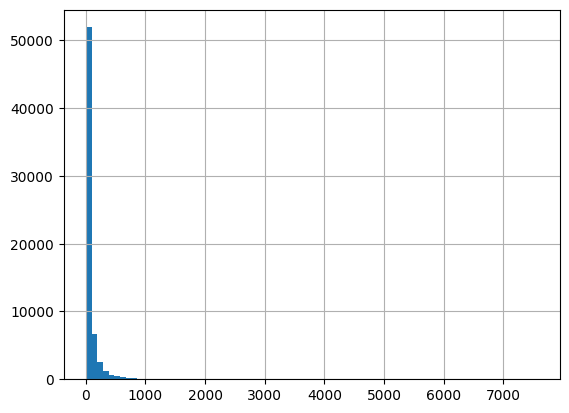

In [118]:
print(df_biz['review_count'].describe())
df_biz['review_count'].hist(bins=80)

#### first focus on the non-binary features 

'business_id', 'name', 'address', 'city', 'state', 'postal_code',
        'latitude', 'longitude', 'stars', 'review_count', 'is_open',
        'categories', 'category_type', 


In [24]:
# getting top 10 cities by review_count columns
df_biz_city=df_biz.groupby('city')['review_count'].sum().sort_values(ascending=False).head(10)
df_biz_city

city
Philadelphia     715497
New Orleans      494038
Nashville        339175
Tampa            317704
Indianapolis     264966
Tucson           259799
Reno             210023
Saint Louis      186965
Santa Barbara    176712
Boise             71186
Name: review_count, dtype: int64

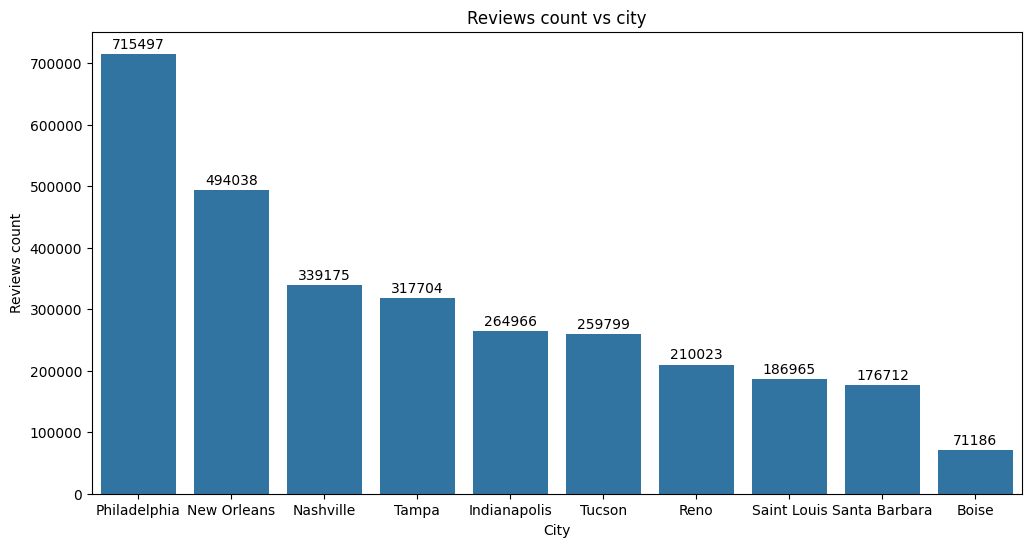

In [30]:
plt.figure(figsize=(12, 6))
df_biz_city_plt = pd.DataFrame(df_biz_city).reset_index()
# sns.scatterplot(x="city",y = 'review_count',data=df_biz_city_plt)
sns.barplot(x="city",y = 'review_count',data=df_biz_city_plt)
ax = plt.gca() # get current axes
ax.bar_label(ax.containers[0], label_type='edge', padding=2)
plt.title('Reviews count vs city')
plt.xlabel('City')
plt.ylabel('Reviews count')
plt.show()

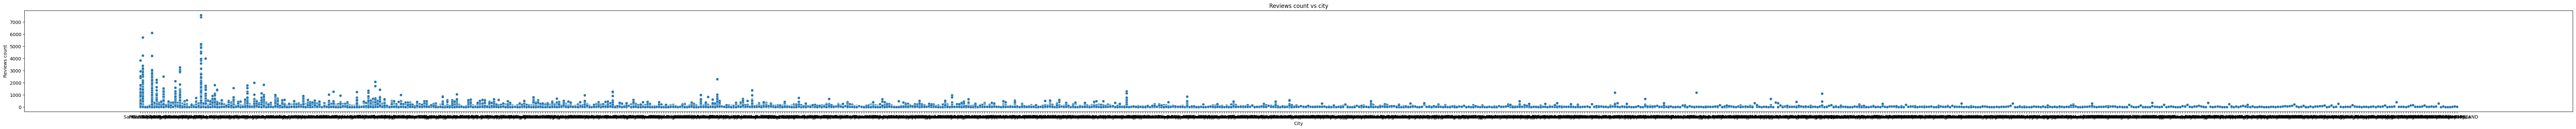

In [35]:
# getting top 10 cities by review count
plt.figure(figsize=(100, 4))
df_biz['city'].value_counts().head(10)

sns.scatterplot(x="city",y = 'review_count',data=df_biz)
plt.title('Reviews count vs city')
plt.xlabel('City')
plt.ylabel('Reviews count')
plt.show()

In [36]:
df_biz_cleaned.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'category_type', 'attributes.ByAppointmentOnly',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BikeParking',
       'attributes.RestaurantsPriceRange2', 'attributes.RestaurantsTakeOut',
       'attributes.RestaurantsDelivery', 'attributes.Caters',
       'attributes.WiFi', 'attributes.BusinessParking',
       'attributes.OutdoorSeating', 'attributes.Alcohol', 'hours.Monday',
       'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday',
       'hours.Saturday', 'hours.Sunday', 'attributes.WheelchairAccessible',
       'attributes.GoodForKids', 'attributes.CoatCheck',
       'attributes.HappyHour', 'attributes.HasTV',
       'attributes.RestaurantsReservations', 'attributes.DogsAllowed',
       'attributes.RestaurantsAttire', 'attributes.Ambience',
       'attributes.RestaurantsTableService',
       

In [38]:
top_10_businesses = (df_biz_cleaned.groupby('name')['review_count']
                     .max() # Or .sum()/.mean() depending on your data structure
                     .nlargest(10)
                     .sort_values(ascending=False) # Optional: sort for the plot
                    )
top_10_businesses

name
Acme Oyster House                     7568
Oceana Grill                          7400
Hattie B’s Hot Chicken - Nashville    6093
Reading Terminal Market               5721
Ruby Slipper - New Orleans            5193
Mother's Restaurant                   5185
Royal House                           5070
Commander's Palace                    4876
Luke                                  4554
Cochon                                4421
Name: review_count, dtype: int64

In [54]:
top_10_businesses_sorted

name
Cochon                                4421
Luke                                  4554
Commander's Palace                    4876
Royal House                           5070
Mother's Restaurant                   5185
Ruby Slipper - New Orleans            5193
Reading Terminal Market               5721
Hattie B’s Hot Chicken - Nashville    6093
Oceana Grill                          7400
Acme Oyster House                     7568
Name: review_count, dtype: int64

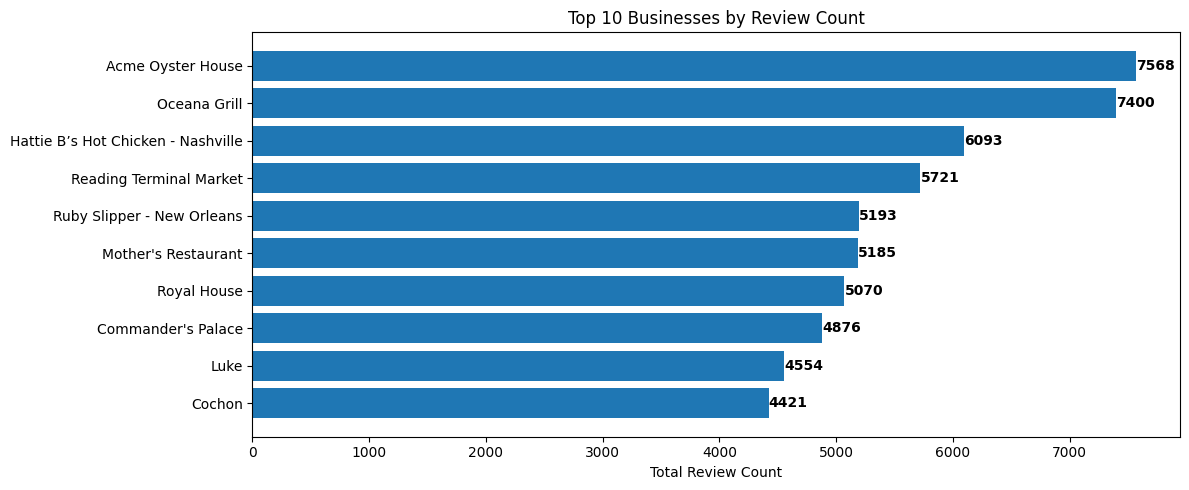

In [59]:
## top 10 businesses by review count (horizontal plot)
fig, ax = plt.subplots(figsize=(12, 5))
top_10_businesses_sorted = top_10_businesses.sort_values(ascending=True)
bars = ax.barh(top_10_businesses_sorted.index, top_10_businesses_sorted.values)
ax.set_title('Top 10 Businesses by Review Count')
ax.set_xlabel('Total Review Count')

# labelling
for bar in bars:
    width = bar.get_width()
    ax.text(width + 3, bar.get_y() + bar.get_height()/2, f'{width}', 
            va='center', fontweight='bold')

plt.tight_layout()
plt.show()

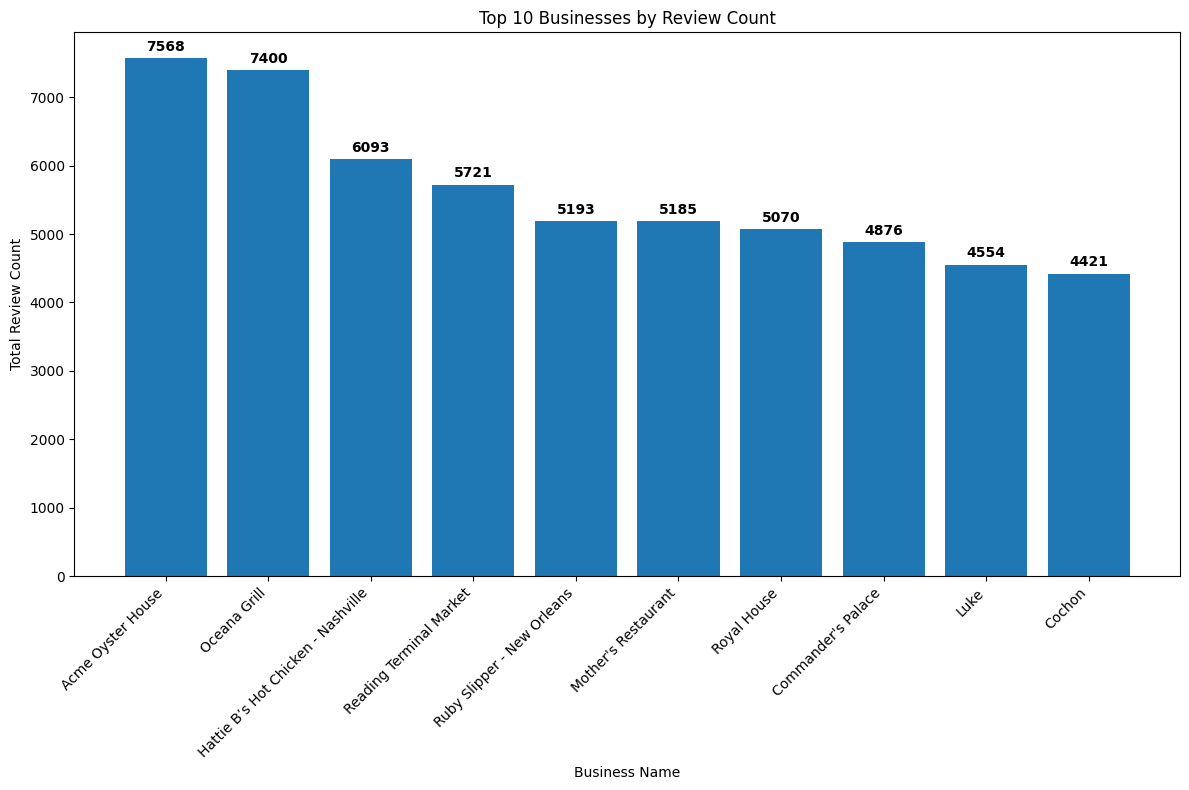

In [ ]:
## top 10 businesses by review count (vertical plot)
fig, ax = plt.subplots(figsize=(12, 8)) 
bars = ax.bar(top_10_businesses.index, top_10_businesses.values)
ax.set_title('Top 10 Businesses by Review Count')
ax.set_ylabel('Total Review Count')
ax.set_xlabel('Business Name')

# rotate long business names and add value labels on top
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontweight='bold')

plt.tight_layout() 
plt.show()

In [33]:
df_biz_cleaned.iloc[1000]['category_type']

'Food'

## Users dataset

In [4]:
import pandas as pd
df_users = pd.read_csv('Data/user_output.csv', low_memory=False)
print("users dataset size:", df_users.shape)
df_users.head()

users dataset size: (1987897, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [6]:
df_users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')